ÊâæÂà∞ 15 ‰∏™ÊúâÊïàÊï∞ÊçÆÊñá‰ª∂


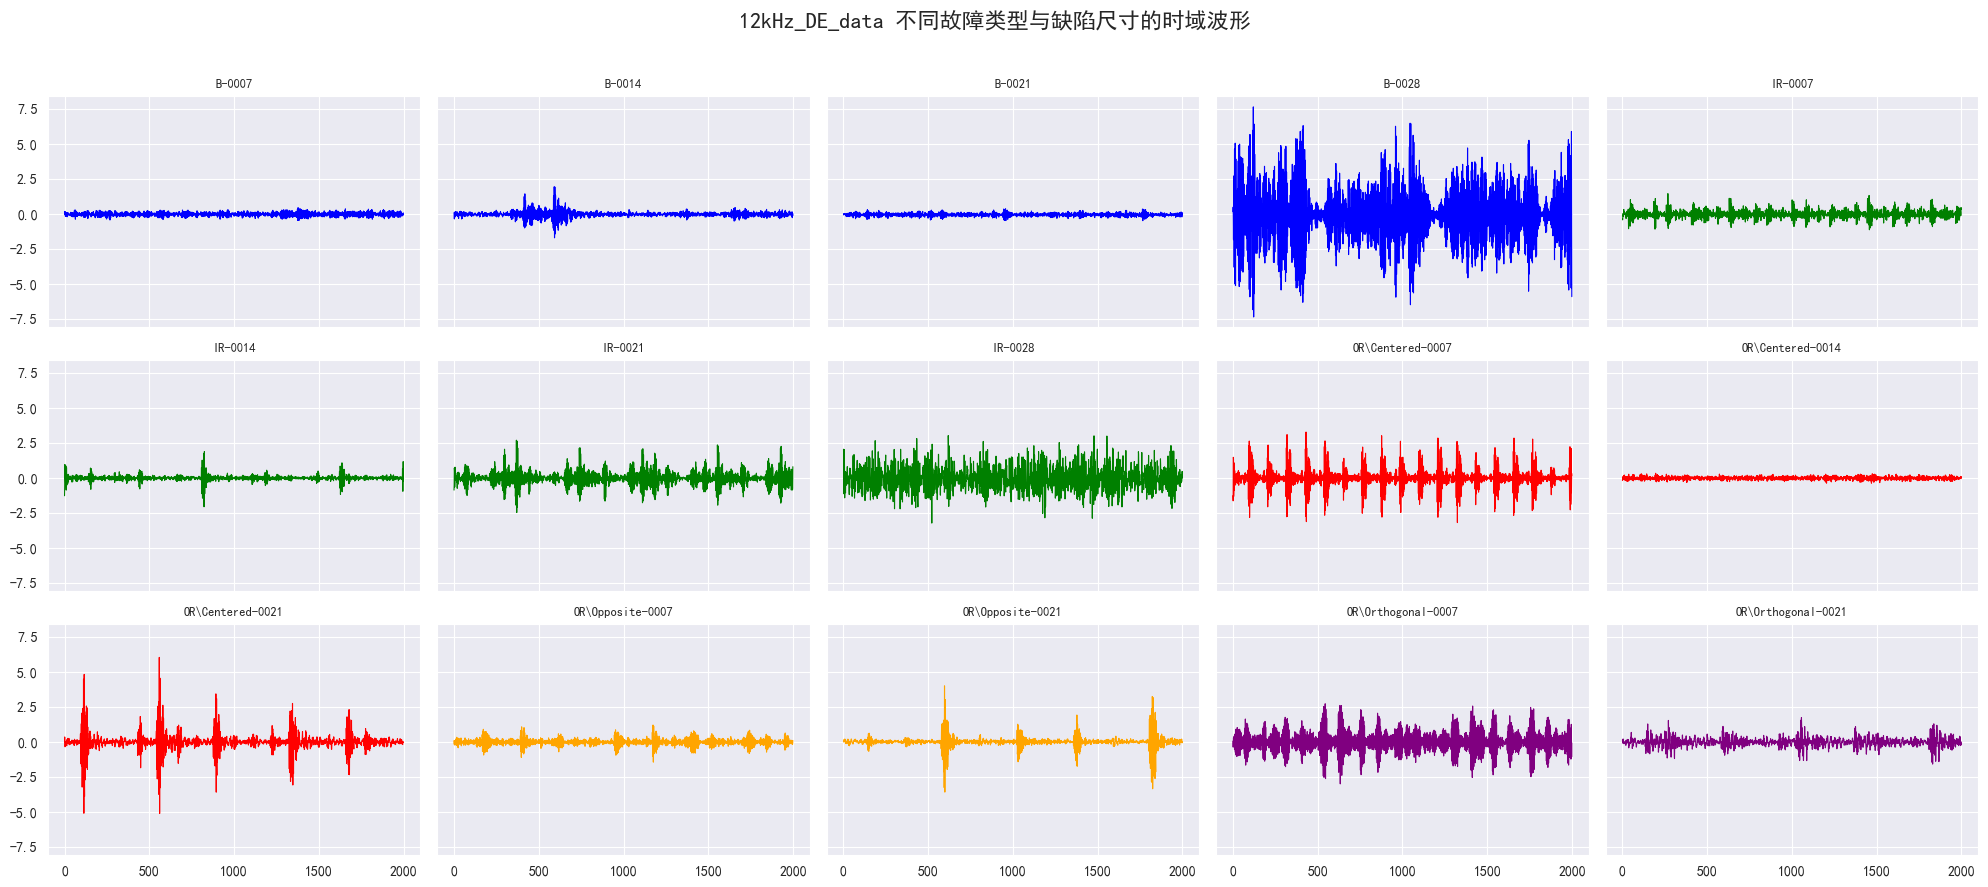

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

root_dir = r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data"

def get_de_signal(df):
    for col in df.columns:
        if "DE" in col:
            return df[col].dropna().values
    raise KeyError("Ê≤°ÊúâÊâæÂà∞ DE Âàó")

# ÂÆö‰πâÊïÖÈöúÁ±ªÂà´
faults = ["B", "IR", os.path.join("OR", "Centered"),
          os.path.join("OR", "Opposite"), os.path.join("OR", "Orthogonal")]
sizes = ["0007", "0014", "0021", "0028"]

# ÂÆö‰πâÈ¢úËâ≤Êò†Â∞Ñ
color_map = {
    "B": "blue",
    "IR": "green",
    "Centered": "red",
    "Opposite": "orange",
    "Orthogonal": "purple"
}

# Êî∂ÈõÜÊúâÊïàÊï∞ÊçÆ
file_list = []
for fault in faults:
    for size in sizes:
        folder = os.path.join(root_dir, fault, size)
        if os.path.exists(folder):
            files = [f for f in os.listdir(folder) if f.endswith(".csv")]
            if files:
                file_path = os.path.join(folder, files[0])  # ÊØè‰∏™Â∞∫ÂØ∏Âèñ‰∏Ä‰∏™Êñá‰ª∂
                file_list.append((fault, size, file_path))

print(f"ÊâæÂà∞ {len(file_list)} ‰∏™ÊúâÊïàÊï∞ÊçÆÊñá‰ª∂")

# Âõ∫ÂÆö 3 Ë°å 5 Âàó
rows, cols = 3, 5
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharex=True, sharey=True)
axes = axes.ravel()

# ÁªòÂà∂
for idx, (fault, size, file_path) in enumerate(file_list):
    df = pd.read_csv(file_path)
    signal = get_de_signal(df)

    # ÂèñÈ¢úËâ≤ÔºàÂØπ OR ÈáåÁöÑÂ≠êÁõÆÂΩïÁâπÊÆäÂ§ÑÁêÜÔºâ
    fault_label = fault.split(os.sep)[-1] if "OR" in fault else fault
    color = color_map.get(fault_label, "black")

    axes[idx].plot(signal[:2000], linewidth=0.8, color=color)
    axes[idx].set_title(f"{fault}-{size}", fontsize=9)

# ÈöêËóèÂ§ö‰ΩôÂ≠êÂõæÔºàÂ¶ÇÊûú‰∏çË∂≥ 15 ‰∏™Ôºâ
for k in range(len(file_list), rows*cols):
    axes[k].set_visible(False)

plt.suptitle("12kHz_DE_data ‰∏çÂêåÊïÖÈöúÁ±ªÂûã‰∏éÁº∫Èô∑Â∞∫ÂØ∏ÁöÑÊó∂ÂüüÊ≥¢ÂΩ¢", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [6]:
import numpy as np
import pandas as pd
import os
from scipy.signal import butter, filtfilt
import pywt

# ====== È¢ÑÂ§ÑÁêÜÂáΩÊï∞ ======
def bandpass_filter(signal, fs, lowcut=500, highcut=3000, order=4):
    """Â∑¥ÁâπÊ≤ÉÊñØÂ∏¶ÈÄöÊª§Ê≥¢"""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, signal)

def wavelet_denoise(signal, wavelet="db8", level=3):
    """Â∞èÊ≥¢ÈòàÂÄºÂéªÂô™"""
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs = [pywt.threshold(c, value=uthresh, mode="soft") for c in coeffs]
    return pywt.waverec(coeffs, wavelet)

def preprocess_signal(signal, fs, method="bandpass"):
    """Áªü‰∏ÄÈ¢ÑÂ§ÑÁêÜÊé•Âè£"""
    if method == "bandpass":
        return bandpass_filter(signal, fs)
    elif method == "wavelet":
        return wavelet_denoise(signal)
    else:
        return signal  # ‰∏çÂ§ÑÁêÜ

ÊâæÂà∞ 161 ‰∏™Êñá‰ª∂


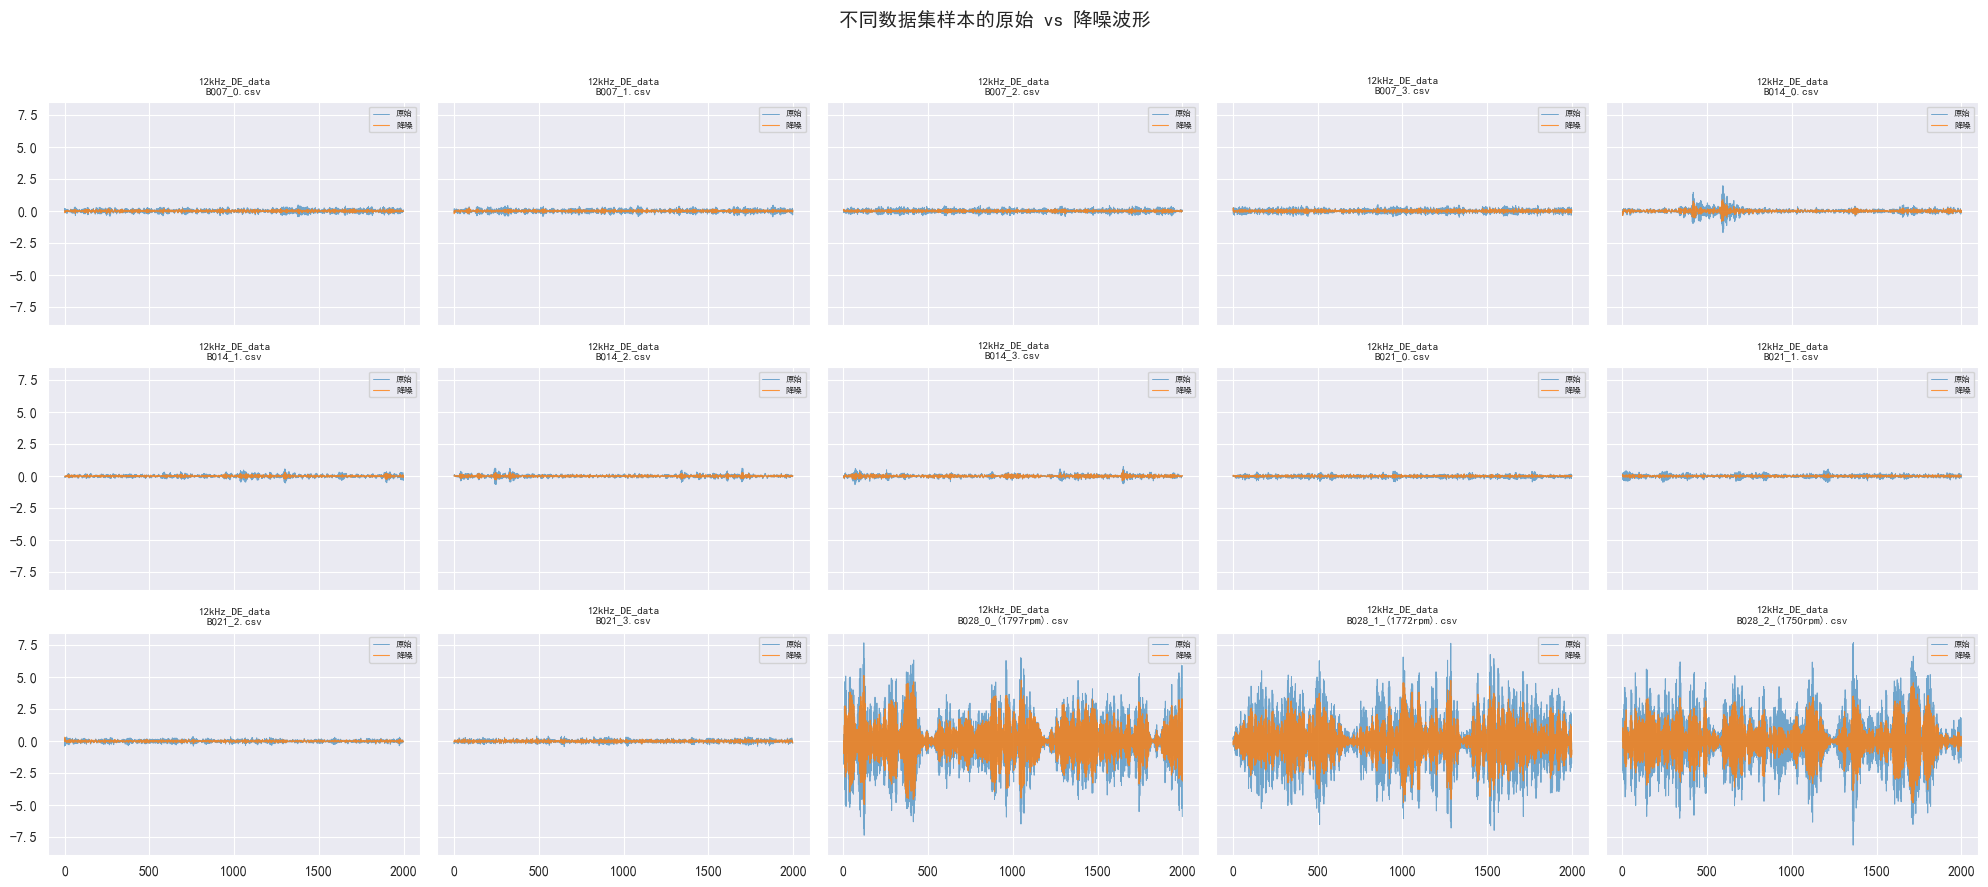

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pywt

plt.rcParams['font.sans-serif'] = ['SimHei']  # ‰∏≠Êñá
plt.rcParams['axes.unicode_minus'] = False

# =================== ÈôçÂô™ÂáΩÊï∞ ===================
def bandpass_filter(signal, fs, lowcut=500, highcut=3000, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, signal)

def wavelet_denoise(signal, wavelet="db8", level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs = [pywt.threshold(c, value=uthresh, mode="soft") for c in coeffs]
    return pywt.waverec(coeffs, wavelet)

def preprocess_signal(signal, fs, method="bandpass"):
    if method == "bandpass":
        return bandpass_filter(signal, fs)
    elif method == "wavelet":
        return wavelet_denoise(signal)
    else:
        return signal

# =================== ÊâπÈáèËØªÂèñ ===================
root_dirs = {
    "12kHz_DE_data": 12000,
    "12kHz_FE_data": 12000,
    "48kHz_DE_data": 48000,
    "48kHz_Normal_data": 48000
}

file_list = []
for dataset, fs in root_dirs.items():
    root_path = os.path.join(r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ", dataset)
    for root, dirs, files in os.walk(root_path):
        for file in files:
            if file.endswith(".csv") and "summary" not in file:
                file_list.append((dataset, fs, os.path.join(root, file)))

print(f"ÊâæÂà∞ {len(file_list)} ‰∏™Êñá‰ª∂")

# =================== Â±ïÁ§∫Â§öÂº†Â≠êÂõæ ===================
rows, cols = 3, 5   # ÊØîÂ¶ÇÂ±ïÁ§∫ 15 Âº†
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharex=True, sharey=True)
axes = axes.ravel()

for idx, (dataset, fs, file_path) in enumerate(file_list[:rows*cols]):  # Âè™Â±ïÁ§∫Ââç15‰∏™
    try:
        df = pd.read_csv(file_path)
        signal = None
        for col in df.columns:
            if "DE" in col or "FE" in col:
                signal = df[col].dropna().values
                break
        if signal is None:
            continue

        # È¢ÑÂ§ÑÁêÜÔºàÈôçÂô™Ôºâ
        signal_filtered = preprocess_signal(signal, fs, method="bandpass")

        # ÁªòÂà∂Ââç2000ÁÇπ
        axes[idx].plot(signal[:2000], alpha=0.6, label="ÂéüÂßã", linewidth=0.7)
        axes[idx].plot(signal_filtered[:2000], alpha=0.8, label="ÈôçÂô™", linewidth=0.8)
        axes[idx].set_title(f"{dataset}\n{os.path.basename(file_path)}", fontsize=8)
        axes[idx].legend(fontsize=6, loc="upper right")
    except Exception as e:
        axes[idx].text(0.5, 0.5, "ËØªÂèñÂ§±Ë¥•", ha="center", va="center")
        print(f"‚ùå ËØªÂèñÂ§±Ë¥• {file_path}: {e}")

# ÂéªÊéâÂ§ö‰ΩôÂ≠êÂõæ
for k in range(len(file_list), rows*cols):
    axes[k].set_visible(False)

plt.suptitle("‰∏çÂêåÊï∞ÊçÆÈõÜÊ†∑Êú¨ÁöÑÂéüÂßã vs ÈôçÂô™Ê≥¢ÂΩ¢", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [8]:
import os
import pandas as pd
import numpy as np

# Ê†πÁõÆÂΩï
root_dir = r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data"

# ÂÆö‰πâ‰∏Ä‰∏™ÂáΩÊï∞ÔºöÊèêÂèñÊó∂ÂüüÁâπÂæÅ
def extract_time_features(signal):
    N = len(signal)
    mean = np.mean(signal)
    std = np.std(signal)
    rms = np.sqrt(np.mean(signal**2))
    peak = np.max(np.abs(signal))
    skewness = pd.Series(signal).skew()
    kurtosis = pd.Series(signal).kurt()
    cf = peak / (rms + 1e-8)
    if_ = peak / (np.mean(np.abs(signal)) + 1e-8)
    mf = peak / ((np.mean(np.sqrt(np.abs(signal)))**2) + 1e-8)

    return {
        "ÂùáÂÄº": mean,
        "Ê†áÂáÜÂ∑Æ": std,
        "ÂùáÊñπÊ†π": rms,
        "Â≥∞ÂÄº": peak,
        "ÂÅèÂ∫¶": skewness,
        "Â≥≠Â∫¶": kurtosis,
        "Â≥∞ÂÄºÂõ†Â≠ê": cf,
        "ËÑâÂÜ≤Âõ†Â≠ê": if_,
        "Ë£ïÂ∫¶Âõ†Â≠ê": mf
    }

# Ëá™Âä®ÊâæÂà∞ DE Âàó
def get_de_signal(df):
    for col in df.columns:
        if "DE" in col:  # ÊâæÂà∞ÂåÖÂê´‚ÄúDE‚ÄùÁöÑÂàó
            return df[col].dropna().values
    raise KeyError("Ê≤°ÊúâÊâæÂà∞ DE Âàó")

# ÈÅçÂéÜÁõÆÂΩï
results = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            try:
                df = pd.read_csv(file_path)
                signal = get_de_signal(df)
                features = extract_time_features(signal)
                features["FileName"] = file
                features["Folder"] = os.path.basename(root)
                results.append(features)
            except Exception as e:
                print(f"‚ùå Êñá‰ª∂ {file_path} Â§ÑÁêÜÂ§±Ë¥•: {e}")

# Ê±áÊÄª‰∏∫ DataFrame
features_df = pd.DataFrame(results)

# ‰øùÂ≠òÁªìÊûú
output_path = os.path.join(root_dir, "time_features_summary.csv")
features_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print("‚úÖ Êó∂ÂüüÁâπÂæÅÊèêÂèñÂÆåÊàêÔºåÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞:", output_path)
print(features_df.head())

‚úÖ Êó∂ÂüüÁâπÂæÅÊèêÂèñÂÆåÊàêÔºåÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data\time_features_summary.csv
         ÂùáÂÄº       Ê†áÂáÜÂ∑Æ       ÂùáÊñπÊ†π        Â≥∞ÂÄº        ÂÅèÂ∫¶         Â≥≠Â∫¶       Â≥∞ÂÄºÂõ†Â≠ê  \
0  0.000144  0.137790  0.137790  0.619627 -0.006781  -0.041105   4.496886   
1 -0.000073  0.138850  0.138850  0.663541  0.007698  -0.028893   4.778828   
2 -0.000055  0.147506  0.147506  0.600019  0.033861  -0.150594   4.067760   
3 -0.000042  0.154108  0.154108  0.724762  0.018634  -0.098679   4.702963   
4 -0.000057  0.147515  0.147515  2.273465  0.274315  17.807148  15.411731   

        ËÑâÂÜ≤Âõ†Â≠ê       Ë£ïÂ∫¶Âõ†Â≠ê    FileName Folder  
0   5.628231   6.642000  B007_0.csv   0007  
1   5.974089   7.039744  B007_1.csv   0007  
2   5.065223   5.960643  B007_2.csv   0007  
3   5.865919   6.910110  B007_3.csv   0007  
4  23.562305  29.842544  B014_0.csv   0014  


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import acf

def plot_time_domain_visualizations(signal, title="‰ø°Âè∑Êó∂ÂüüÂèØËßÜÂåñ"):
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.ravel()

    # 1. Ê¶ÇÁéáÂØÜÂ∫¶
    sns.kdeplot(signal, fill=True, color="blue", ax=axes[0])
    axes[0].set_title("Ê¶ÇÁéáÂØÜÂ∫¶ÂàÜÂ∏É")

    # 2. Ëá™Áõ∏ÂÖ≥ÂáΩÊï∞
    acf_vals = acf(signal, nlags=200)
    axes[1].plot(acf_vals)
    axes[1].set_title("Ëá™Áõ∏ÂÖ≥ÂáΩÊï∞")

    # 3. Á¥ØÁßØÂàÜÂ∏É
    sorted_vals = np.sort(signal)
    cdf = np.arange(len(signal)) / len(signal)
    axes[2].plot(sorted_vals, cdf)
    axes[2].set_title("Á¥ØÁßØÂàÜÂ∏ÉÂáΩÊï∞")

    # 4. ÁÆ±Á∫øÂõæ
    axes[3].boxplot(signal, vert=True, patch_artist=True)
    axes[3].set_title("ÁÆ±Á∫øÂõæ")

    # 5. ÊªëÂä® RMS
    window = 200
    rms_vals = np.array([np.sqrt(np.mean(signal[i:i+window]**2))
                         for i in range(len(signal)-window)])
    axes[4].plot(rms_vals)
    axes[4].set_title("ÊªëÂä® RMS ËÉΩÈáè")

    # 6. ÂéüÂßãÊó∂ÂüüÊ≥¢ÂΩ¢
    axes[5].plot(signal[:2000])
    axes[5].set_title("Êó∂ÂüüÊ≥¢ÂΩ¢")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

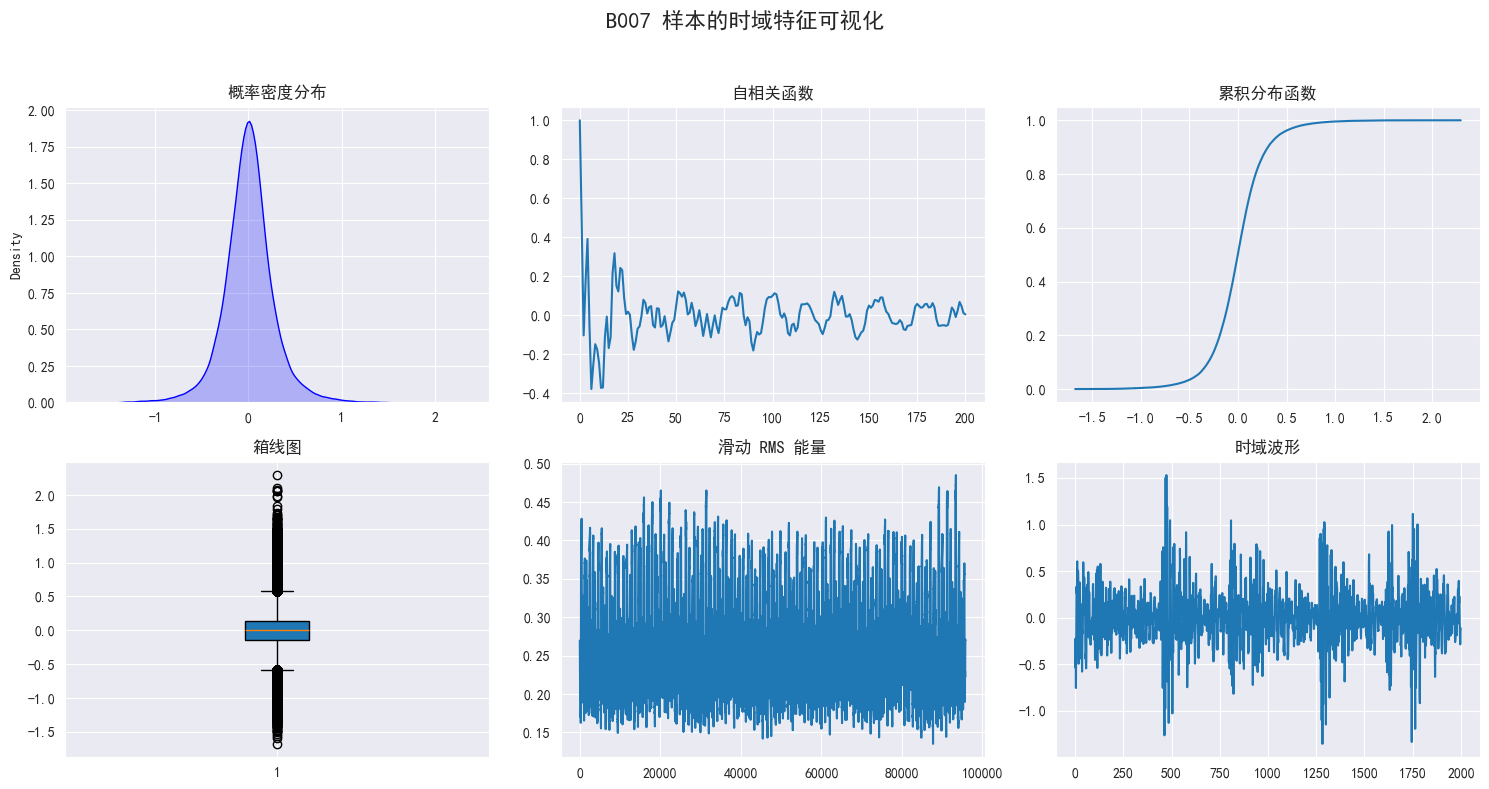

In [11]:
plot_time_domain_visualizations(signal, title="B007 Ê†∑Êú¨ÁöÑÊó∂ÂüüÁâπÂæÅÂèØËßÜÂåñ")

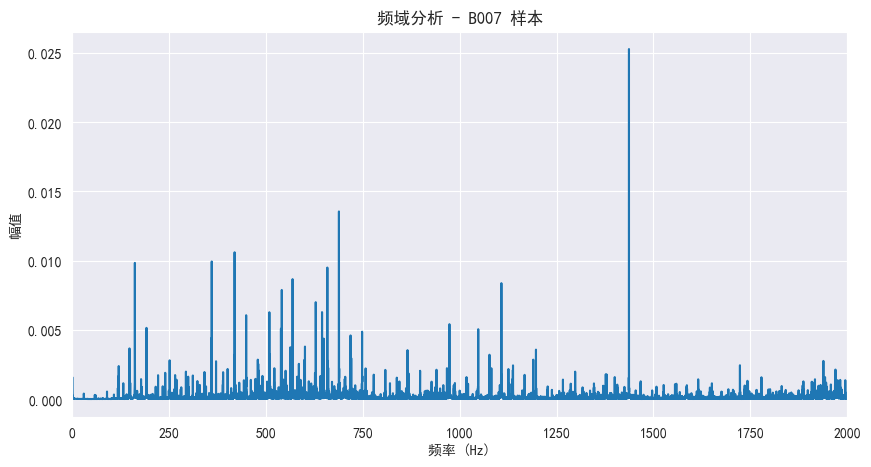

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ËØªÂèñ‰∏Ä‰∏™Ê†∑Êú¨‰ø°Âè∑
file_path = r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data\B\0007\B007_0.csv"
df = pd.read_csv(file_path)

# Ëá™Âä®ÊâæÂà∞ DE Âàó
col = [c for c in df.columns if "DE" in c][0]
signal = df[col].values
N = len(signal)

# ÈááÊ†∑È¢ëÁéáÔºàCWRU Êï∞ÊçÆÈõÜÊòØ 12 kHzÔºâ
fs = 12000  
t = np.arange(N) / fs

# === FFT ===
fft_vals = np.fft.fft(signal)
fft_vals = np.abs(fft_vals[:N//2]) * 2 / N   # ÂèñÂâç‰∏ÄÂçäÔºåÂπÖÂÄºÂΩí‰∏ÄÂåñ
freqs = np.fft.fftfreq(N, 1/fs)[:N//2]

# ÁªòÂà∂È¢ëË∞±
plt.figure(figsize=(10,5))
plt.plot(freqs, fft_vals)
plt.title("È¢ëÂüüÂàÜÊûê - B007 Ê†∑Êú¨")
plt.xlabel("È¢ëÁéá (Hz)")
plt.ylabel("ÂπÖÂÄº")
plt.xlim(0, 2000)  # Âè™Áîª 0-2000 HzÔºàÂ∏∏Áî®ËåÉÂõ¥Ôºâ
plt.grid(True)
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

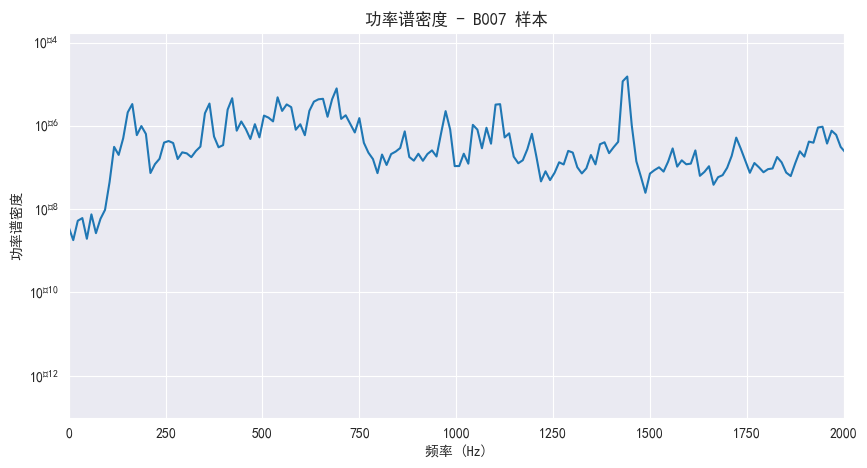

In [13]:
from scipy.signal import welch

f, Pxx = welch(signal, fs=fs, nperseg=1024)

plt.figure(figsize=(10,5))
plt.semilogy(f, Pxx)
plt.title("ÂäüÁéáË∞±ÂØÜÂ∫¶ - B007 Ê†∑Êú¨")
plt.xlabel("È¢ëÁéá (Hz)")
plt.ylabel("ÂäüÁéáË∞±ÂØÜÂ∫¶")
plt.xlim(0, 2000)
plt.grid(True)
plt.show()

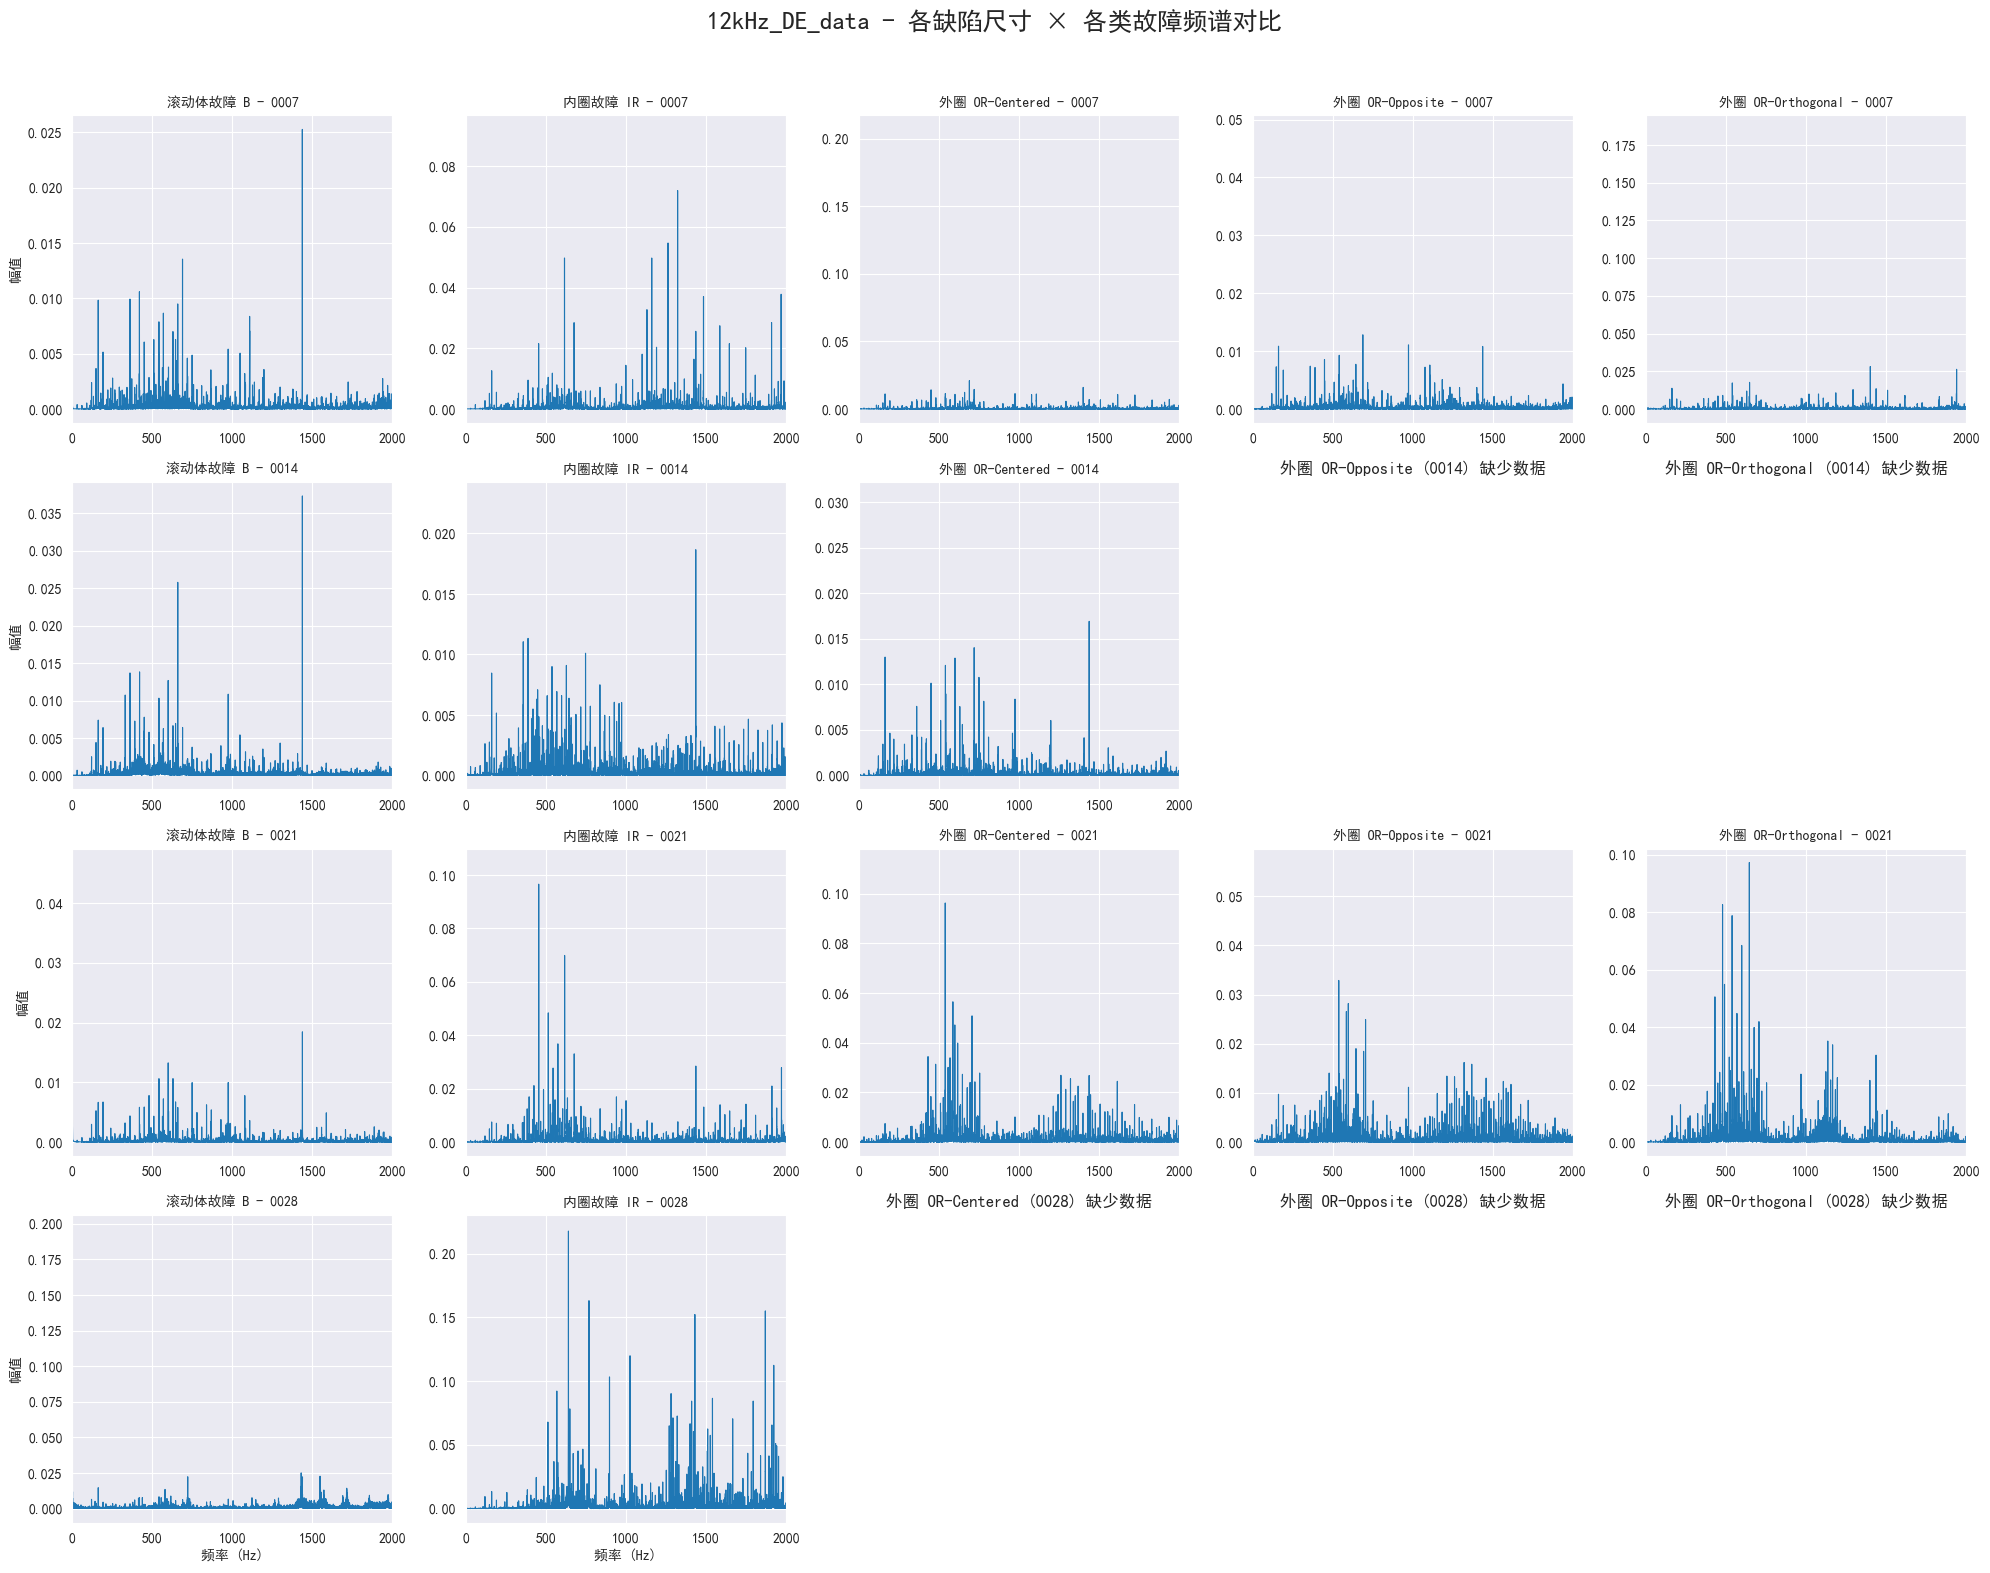

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

root_dir = r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data"

# Áº∫Èô∑Â∞∫ÂØ∏ÂíåÁ±ªÂà´
defect_sizes = ["0007", "0014", "0021", "0028"]
fault_types = {
    "ÊªöÂä®‰ΩìÊïÖÈöú B": ["B"],
    "ÂÜÖÂúàÊïÖÈöú IR": ["IR"],
    "Â§ñÂúà OR-Centered": ["OR", "Centered"],
    "Â§ñÂúà OR-Opposite": ["OR", "Opposite"],
    "Â§ñÂúà OR-Orthogonal": ["OR", "Orthogonal"]
}

fs = 12000  # ÈááÊ†∑È¢ëÁéá

def get_de_signal(df):
    for col in df.columns:
        if "DE" in col:
            return df[col].dropna().values
    raise KeyError("Ê≤°ÊúâÊâæÂà∞ DE Âàó")

def compute_fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_vals = np.abs(fft_vals[:N//2]) * 2 / N
    freqs = np.fft.fftfreq(N, 1/fs)[:N//2]
    return freqs, fft_vals

# ==== ÁªòÂà∂ÁΩëÊ†ºÔºöË°å=Áº∫Èô∑Â∞∫ÂØ∏ÔºåÂàó=ÊïÖÈöúÁ±ªÂûã ====
fig, axes = plt.subplots(len(defect_sizes), len(fault_types), figsize=(20, 16))
axes = np.array(axes)

for i, size in enumerate(defect_sizes):
    for j, (title, parts) in enumerate(fault_types.items()):
        ax = axes[i, j]

        # ÊãºÊé•Ë∑ØÂæÑ
        if len(parts) == 1:  # B, IR
            folder = os.path.join(root_dir, parts[0], size)
        else:  # OR Á±ª
            folder = os.path.join(root_dir, parts[0], parts[1], size)

        if not os.path.exists(folder):
            ax.set_title(f"{title} ({size}) Áº∫Â∞ëÊï∞ÊçÆ")
            ax.axis("off")
            continue

        files = [f for f in os.listdir(folder) if f.endswith(".csv")]
        if not files:
            ax.set_title(f"{title} ({size}) Ê≤°ÊúâCSVÊñá‰ª∂")
            ax.axis("off")
            continue

        # ÂèñÁ¨¨‰∏Ä‰∏™CSVÊñá‰ª∂
        file_path = os.path.join(folder, files[0])
        df = pd.read_csv(file_path)
        signal = get_de_signal(df)

        freqs, fft_vals = compute_fft(signal, fs)

        ax.plot(freqs, fft_vals, lw=0.8)
        ax.set_xlim(0, 2000)
        ax.set_title(f"{title} - {size}", fontsize=10)
        if i == len(defect_sizes) - 1:
            ax.set_xlabel("È¢ëÁéá (Hz)")
        if j == 0:
            ax.set_ylabel("ÂπÖÂÄº")

plt.suptitle("12kHz_DE_data - ÂêÑÁº∫Èô∑Â∞∫ÂØ∏ √ó ÂêÑÁ±ªÊïÖÈöúÈ¢ëË∞±ÂØπÊØî", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

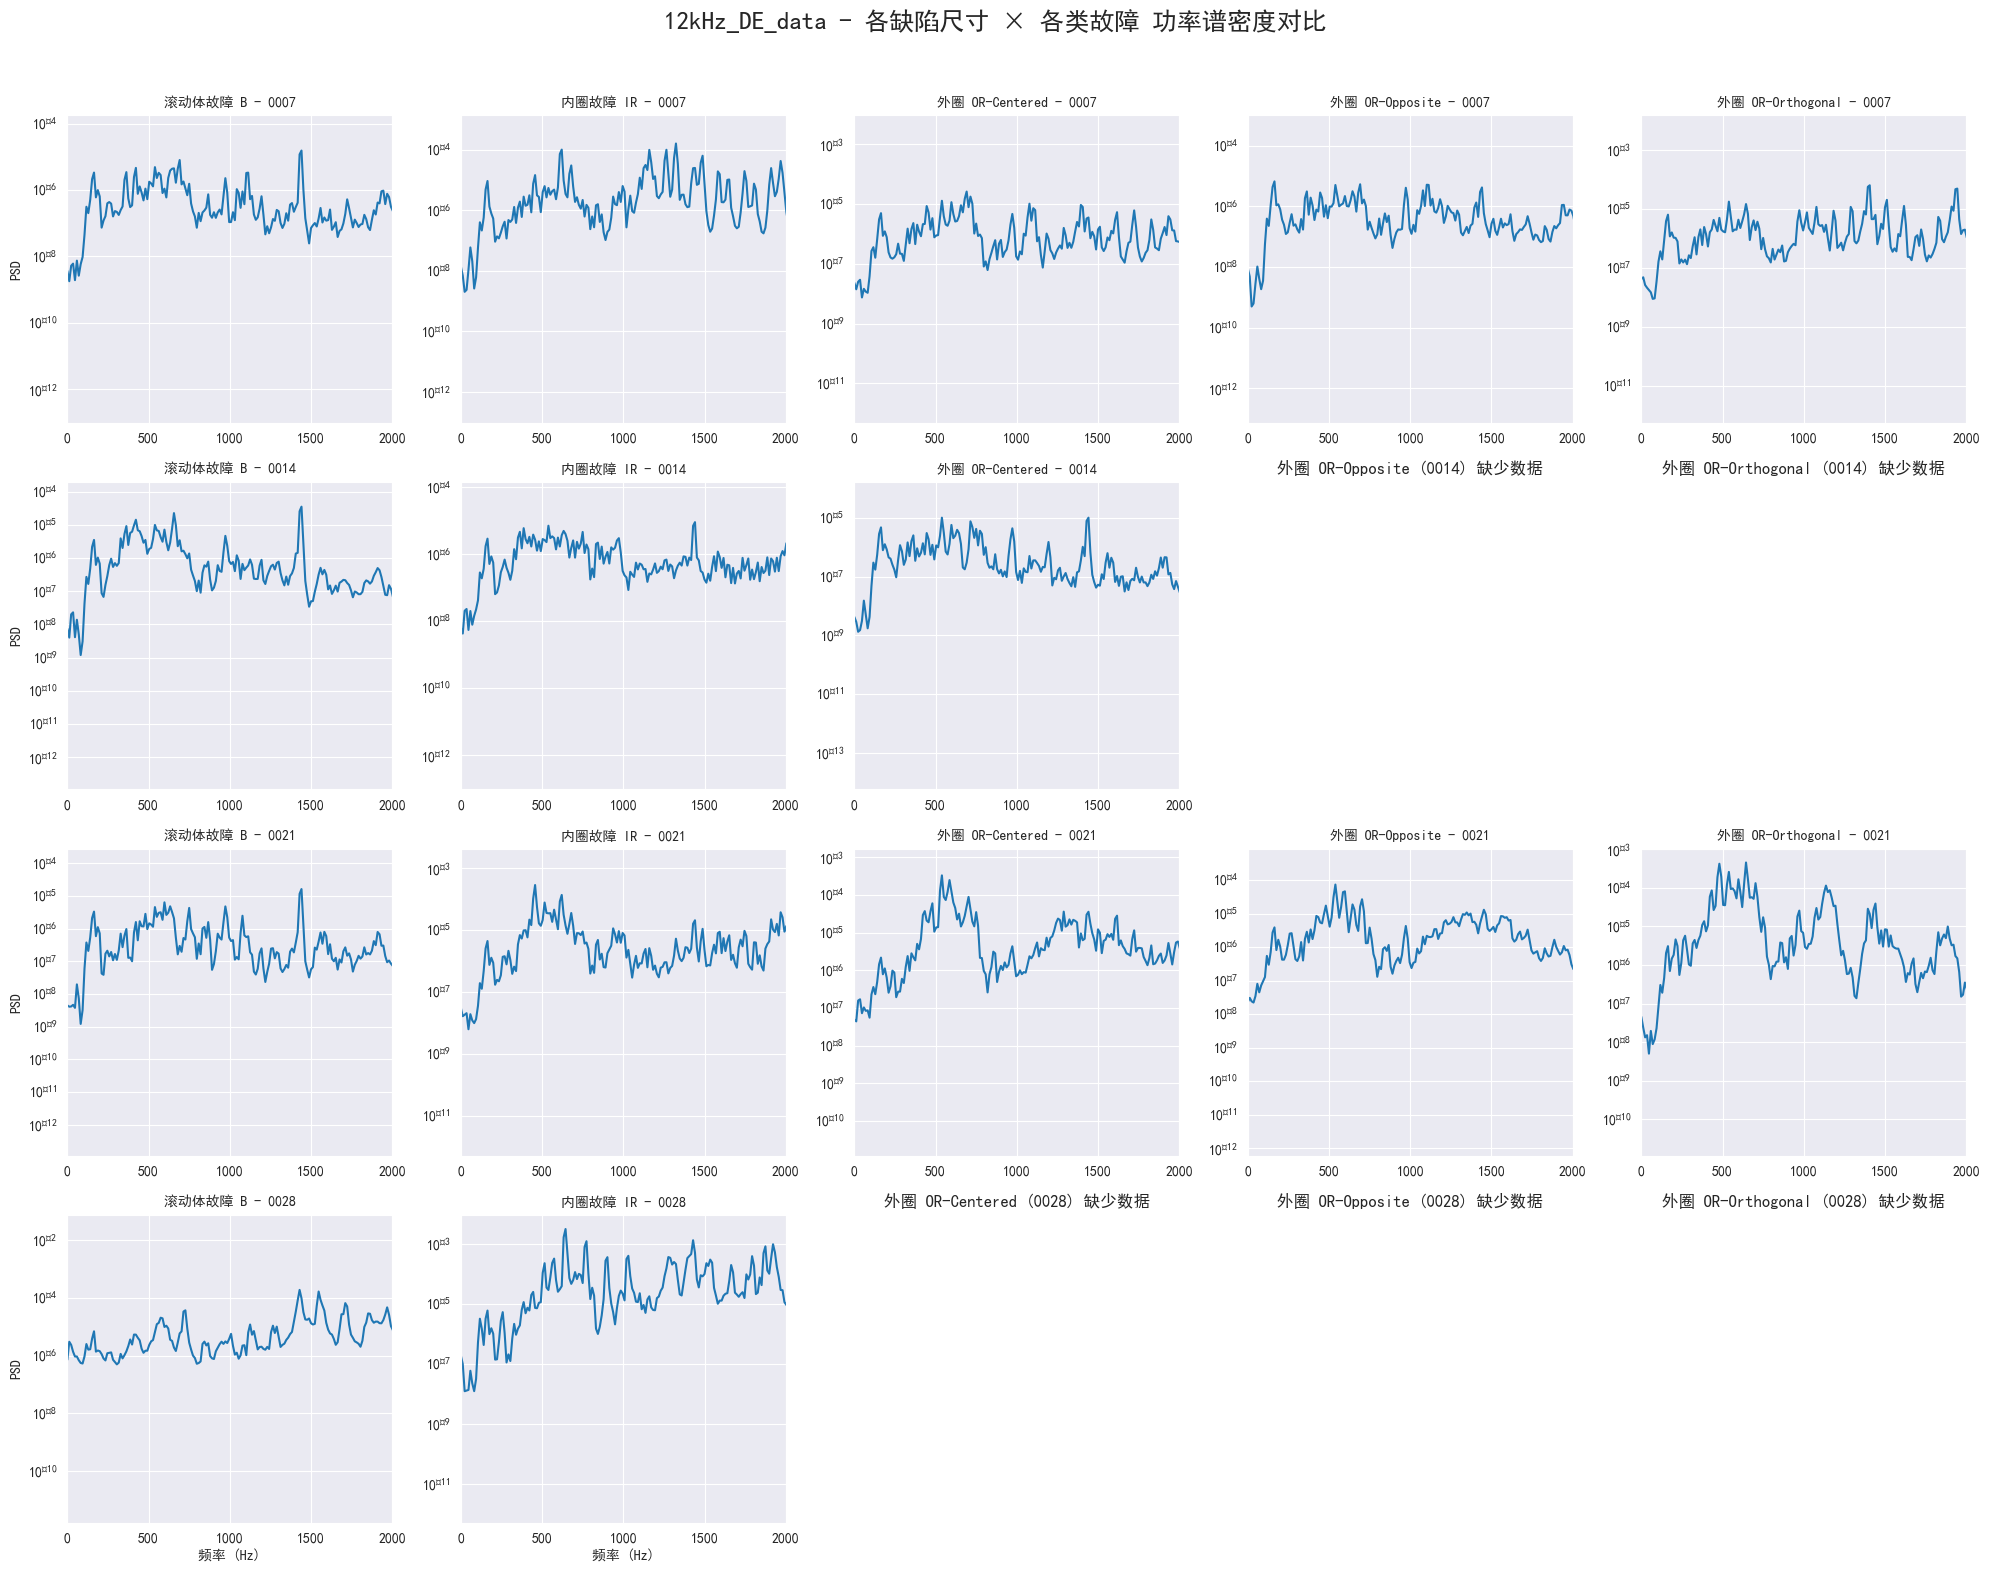

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# ËÆæÁΩÆ‰∏≠Êñá
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

root_dir = r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data"

# Áº∫Èô∑Â∞∫ÂØ∏ÂíåÁ±ªÂà´
defect_sizes = ["0007", "0014", "0021", "0028"]
fault_types = {
    "ÊªöÂä®‰ΩìÊïÖÈöú B": ["B"],
    "ÂÜÖÂúàÊïÖÈöú IR": ["IR"],
    "Â§ñÂúà OR-Centered": ["OR", "Centered"],
    "Â§ñÂúà OR-Opposite": ["OR", "Opposite"],
    "Â§ñÂúà OR-Orthogonal": ["OR", "Orthogonal"]
}

fs = 12000  # ÈááÊ†∑È¢ëÁéá

def get_de_signal(df):
    for col in df.columns:
        if "DE" in col:
            return df[col].dropna().values
    raise KeyError("Ê≤°ÊúâÊâæÂà∞ DE Âàó")

# ==== ÁªòÂà∂ÂäüÁéáË∞±ÂØÜÂ∫¶ (Welch) ====
fig, axes = plt.subplots(len(defect_sizes), len(fault_types), figsize=(20, 16))
axes = np.array(axes)

for i, size in enumerate(defect_sizes):
    for j, (title, parts) in enumerate(fault_types.items()):
        ax = axes[i, j]

        # ÊãºË∑ØÂæÑ
        if len(parts) == 1:
            folder = os.path.join(root_dir, parts[0], size)
        else:
            folder = os.path.join(root_dir, parts[0], parts[1], size)

        if not os.path.exists(folder):
            ax.set_title(f"{title} ({size}) Áº∫Â∞ëÊï∞ÊçÆ")
            ax.axis("off")
            continue

        files = [f for f in os.listdir(folder) if f.endswith(".csv")]
        if not files:
            ax.set_title(f"{title} ({size}) Ê≤°ÊúâCSV")
            ax.axis("off")
            continue

        file_path = os.path.join(folder, files[0])
        df = pd.read_csv(file_path)
        signal = get_de_signal(df)

        # Welch PSD
        f, Pxx = welch(signal, fs=fs, nperseg=1024)

        ax.semilogy(f, Pxx)
        ax.set_xlim(0, 2000)
        ax.set_title(f"{title} - {size}", fontsize=10)

        if i == len(defect_sizes) - 1:
            ax.set_xlabel("È¢ëÁéá (Hz)")
        if j == 0:
            ax.set_ylabel("PSD")

plt.suptitle("12kHz_DE_data - ÂêÑÁº∫Èô∑Â∞∫ÂØ∏ √ó ÂêÑÁ±ªÊïÖÈöú ÂäüÁéáË∞±ÂØÜÂ∫¶ÂØπÊØî", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

ÊâæÂà∞ 15 ‰∏™ÊúâÊïàÊ†∑Êú¨


C:\Users\NSwor\AppData\Local\Temp\ipykernel_27492\3229638386.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.92,0.96])


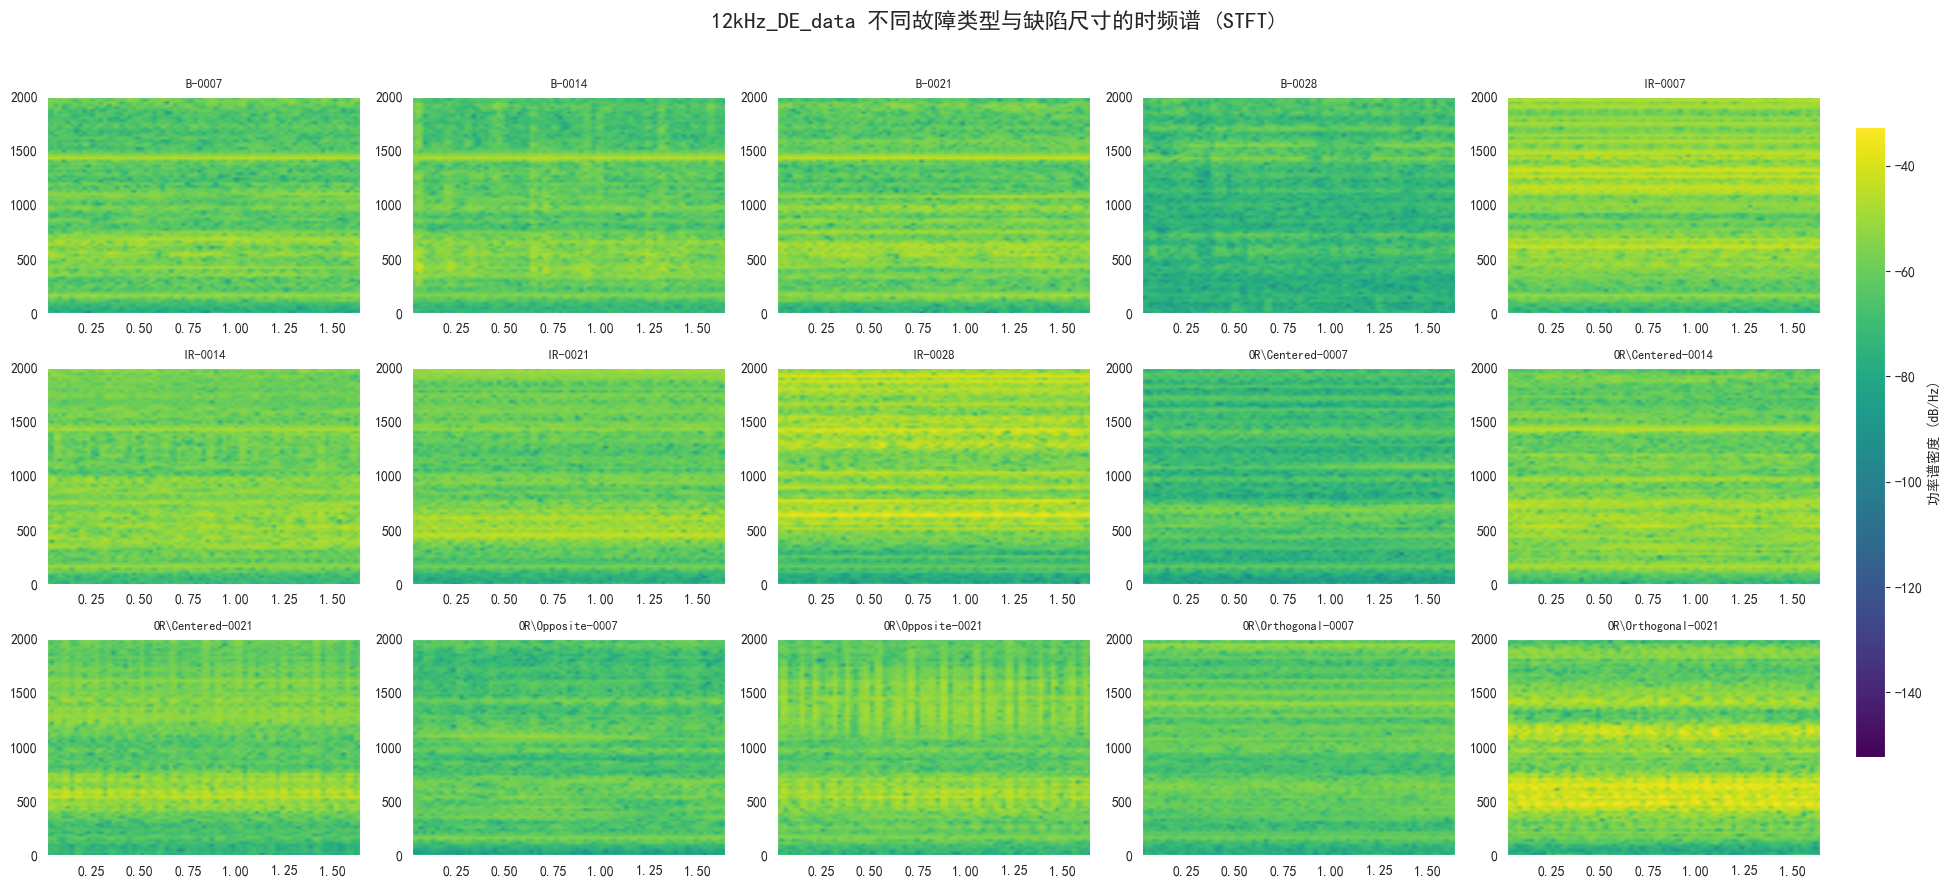

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

root_dir = r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data"

def get_de_signal(df):
    for col in df.columns:
        if "DE" in col:
            return df[col].dropna().values
    raise KeyError("Ê≤°ÊúâÊâæÂà∞ DE Âàó")

# ÂÆö‰πâÊïÖÈöúÁ±ªÂûãÂíåÁº∫Èô∑Â∞∫ÂØ∏
faults = ["B", "IR", os.path.join("OR", "Centered"),
          os.path.join("OR", "Opposite"), os.path.join("OR", "Orthogonal")]
sizes = ["0007", "0014", "0021", "0028"]

# Êî∂ÈõÜÊï∞ÊçÆ
file_list = []
for fault in faults:
    for size in sizes:
        folder = os.path.join(root_dir, fault, size)
        if os.path.exists(folder):
            files = [f for f in os.listdir(folder) if f.endswith(".csv")]
            if files:
                file_path = os.path.join(folder, files[0])
                file_list.append((fault, size, file_path))

print(f"ÊâæÂà∞ {len(file_list)} ‰∏™ÊúâÊïàÊ†∑Êú¨")

# Âõ∫ÂÆö 3√ó5 Â∏ÉÂ±Ä
rows, cols = 3, 5
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharex=False, sharey=False)
axes = axes.ravel()

fs = 12000  # CWRU ÈááÊ†∑È¢ëÁéá

# ÁªòÂà∂ STFT
for idx, (fault, size, file_path) in enumerate(file_list):
    df = pd.read_csv(file_path)
    signal = get_de_signal(df)

    f, t, Sxx = spectrogram(signal[:20000], fs=fs, nperseg=512, noverlap=256)

    im = axes[idx].pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud', cmap="viridis")
    axes[idx].set_title(f"{fault}-{size}", fontsize=9)
    axes[idx].set_ylim(0, 2000)  # Âè™Áúã 0-2000Hz ËåÉÂõ¥

# Âà†Èô§Â§ö‰ΩôÂ≠êÂõæ
for k in range(len(file_list), rows*cols):
    axes[k].set_visible(False)

# Áªü‰∏ÄÂä†‰∏Ä‰∏™ colorbar
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label="ÂäüÁéáË∞±ÂØÜÂ∫¶ (dB/Hz)")

plt.suptitle("12kHz_DE_data ‰∏çÂêåÊïÖÈöúÁ±ªÂûã‰∏éÁº∫Èô∑Â∞∫ÂØ∏ÁöÑÊó∂È¢ëË∞± (STFT)", fontsize=16)
plt.tight_layout(rect=[0,0,0.92,0.96])
plt.show()

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.fft import fft
from scipy.signal import welch

# ÊèêÂèñÊó∂ÂüüÁâπÂæÅ
def time_domain_features(signal):
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    skew_val = skew(signal)
    kurt_val = kurtosis(signal)
    peak = np.max(np.abs(signal))
    rms = np.sqrt(np.mean(signal**2))
    crest_factor = peak / rms
    impulse_factor = peak / np.mean(np.abs(signal))
    shape_factor = rms / np.mean(np.abs(signal))
    
    return {
        "Êó∂Âüü_ÂùáÂÄº": mean_val,
        "Êó∂Âüü_Ê†áÂáÜÂ∑Æ": std_val,
        "Êó∂Âüü_ÂÅèÂ∫¶": skew_val,
        "Êó∂Âüü_Â≥≠Â∫¶": kurt_val,
        "Êó∂Âüü_Â≥∞ÂÄº": peak,
        "Êó∂Âüü_RMS": rms,
        "Êó∂Âüü_Â≥∞ÂÄºÂõ†Â≠ê": crest_factor,
        "Êó∂Âüü_ËÑâÂÜ≤Âõ†Â≠ê": impulse_factor,
        "Êó∂Âüü_Ê≥¢ÂΩ¢Âõ†Â≠ê": shape_factor
    }

# ÊèêÂèñÈ¢ëÂüüÁâπÂæÅ
def freq_domain_features(signal, fs=12000):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, d=1/fs)
    spectrum = np.abs(fft(signal))[:len(freqs)]
    spectrum = spectrum / np.sum(spectrum)  # ÂΩí‰∏ÄÂåñ
    
    mean_freq = np.sum(freqs * spectrum)
    freq_var = np.sum(((freqs - mean_freq)**2) * spectrum)
    freq_centroid = np.sum(freqs * spectrum) / np.sum(spectrum)
    
    # Welch ÂäüÁéáË∞±
    f, Pxx = welch(signal, fs=fs, nperseg=1024)
    main_freq = f[np.argmax(Pxx)]
    
    return {
        "È¢ëÂüü_ÂùáÂÄºÈ¢ëÁéá": mean_freq,
        "È¢ëÂüü_È¢ëÁéáÊñπÂ∑Æ": freq_var,
        "È¢ëÂüü_È¢ëÁéáÈáçÂøÉ": freq_centroid,
        "È¢ëÂüü_‰∏ªÈ¢ë": main_freq
    }

# Êó∂È¢ëÂüüÁâπÂæÅ (STFT ËÉΩÈáèÁÜµ)
from scipy.signal import spectrogram
def time_freq_features(signal, fs=12000):
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=256, noverlap=128)
    Sxx_norm = Sxx / np.sum(Sxx)
    Sxx_norm = Sxx_norm[Sxx_norm > 0]
    entropy = -np.sum(Sxx_norm * np.log(Sxx_norm))
    
    return {
        "Êó∂È¢ëÂüü_ËÉΩÈáèÁÜµ": entropy
    }

# === ÁªºÂêàÁâπÂæÅÊèêÂèñÂáΩÊï∞ ===
def extract_features(signal, fs=12000):
    features = {}
    features.update(time_domain_features(signal))
    features.update(freq_domain_features(signal, fs))
    features.update(time_freq_features(signal, fs))
    return features

# ===== Á§∫‰æã =====
import pandas as pd
import os

root_dir = r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ/12kHz_DE_data\B\0007"
file = [f for f in os.listdir(root_dir) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(root_dir, file))

# Ëá™Âä®ÊâæÂà∞ DE Âàó
for col in df.columns:
    if "DE" in col:
        signal = df[col].dropna().values
        break

features = extract_features(signal[:20000], fs=12000)
print(pd.DataFrame([features]))

      Êó∂Âüü_ÂùáÂÄº    Êó∂Âüü_Ê†áÂáÜÂ∑Æ     Êó∂Âüü_ÂÅèÂ∫¶     Êó∂Âüü_Â≥≠Â∫¶     Êó∂Âüü_Â≥∞ÂÄº   Êó∂Âüü_RMS   Êó∂Âüü_Â≥∞ÂÄºÂõ†Â≠ê  \
0  0.002275  0.137511 -0.025883 -0.058878  0.570572  0.13753  4.148707   

    Êó∂Âüü_ËÑâÂÜ≤Âõ†Â≠ê   Êó∂Âüü_Ê≥¢ÂΩ¢Âõ†Â≠ê      È¢ëÂüü_ÂùáÂÄºÈ¢ëÁéá       È¢ëÂüü_È¢ëÁéáÊñπÂ∑Æ      È¢ëÂüü_È¢ëÁéáÈáçÂøÉ       È¢ëÂüü_‰∏ªÈ¢ë  \
0  5.192874  1.251685  2778.589368  1.121214e+06  2778.589368  3363.28125   

   Êó∂È¢ëÂüü_ËÉΩÈáèÁÜµ  
0  7.93389  


In [18]:
import os
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fft import fft
from scipy.signal import welch, spectrogram

# ====================== ÁâπÂæÅÂáΩÊï∞ ======================
def get_de_signal(df):
    for col in df.columns:
        if "DE" in col:   # Drive End
            return df[col].dropna().values
        if "FE" in col:   # Fan End
            return df[col].dropna().values
    raise KeyError("Ê≤°ÊúâÊâæÂà∞ DE Êàñ FE Âàó")

def time_domain_features(signal):
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    skew_val = skew(signal)
    kurt_val = kurtosis(signal)
    peak = np.max(np.abs(signal))
    rms = np.sqrt(np.mean(signal**2))
    crest_factor = peak / rms
    impulse_factor = peak / np.mean(np.abs(signal))
    shape_factor = rms / np.mean(np.abs(signal))
    return {
        "Êó∂Âüü_ÂùáÂÄº": mean_val,
        "Êó∂Âüü_Ê†áÂáÜÂ∑Æ": std_val,
        "Êó∂Âüü_ÂÅèÂ∫¶": skew_val,
        "Êó∂Âüü_Â≥≠Â∫¶": kurt_val,
        "Êó∂Âüü_Â≥∞ÂÄº": peak,
        "Êó∂Âüü_RMS": rms,
        "Êó∂Âüü_Â≥∞ÂÄºÂõ†Â≠ê": crest_factor,
        "Êó∂Âüü_ËÑâÂÜ≤Âõ†Â≠ê": impulse_factor,
        "Êó∂Âüü_Ê≥¢ÂΩ¢Âõ†Â≠ê": shape_factor
    }

def freq_domain_features(signal, fs=12000):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, d=1/fs)
    spectrum = np.abs(fft(signal))[:len(freqs)]
    spectrum = spectrum / np.sum(spectrum)
    mean_freq = np.sum(freqs * spectrum)
    freq_var = np.sum(((freqs - mean_freq)**2) * spectrum)
    freq_centroid = np.sum(freqs * spectrum) / np.sum(spectrum)
    f, Pxx = welch(signal, fs=fs, nperseg=1024)
    main_freq = f[np.argmax(Pxx)]
    return {
        "È¢ëÂüü_ÂùáÂÄºÈ¢ëÁéá": mean_freq,
        "È¢ëÂüü_È¢ëÁéáÊñπÂ∑Æ": freq_var,
        "È¢ëÂüü_È¢ëÁéáÈáçÂøÉ": freq_centroid,
        "È¢ëÂüü_‰∏ªÈ¢ë": main_freq
    }

def time_freq_features(signal, fs=12000):
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=256, noverlap=128)
    Sxx_norm = Sxx / np.sum(Sxx)
    Sxx_norm = Sxx_norm[Sxx_norm > 0]
    entropy = -np.sum(Sxx_norm * np.log(Sxx_norm))
    return {"Êó∂È¢ëÂüü_ËÉΩÈáèÁÜµ": entropy}

def extract_features(signal, fs=12000):
    features = {}
    features.update(time_domain_features(signal))
    features.update(freq_domain_features(signal, fs))
    features.update(time_freq_features(signal, fs))
    return features

# ====================== ÊâπÈáèÂ§ÑÁêÜ ======================
root_dirs = {
    "12kHz_DE_data": 12000,
    "12kHz_FE_data": 12000,
    "48kHz_DE_data": 48000,
    "48kHz_Normal_data": 48000
}

all_features = []

for dataset, fs in root_dirs.items():
    root_path = os.path.join(r"Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ", dataset)
    for root, dirs, files in os.walk(root_path):
        for file in files:
            if file.endswith(".csv") and "summary" not in file:  # üö® ËøáÊª§Êéâ summary Êñá‰ª∂
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path)
                    signal = get_de_signal(df).astype(float)
                    signal = signal[:20000]  # Áªü‰∏ÄÈïøÂ∫¶
                    
                    feats = extract_features(signal, fs)
                    feats["Êï∞ÊçÆÈõÜ"] = dataset
                    feats["Êñá‰ª∂Âêç"] = file
                    feats["Êñá‰ª∂Â§π"] = os.path.basename(root)
                    all_features.append(feats)
                except Exception as e:
                    print(f"‚ùå ËØªÂèñÂ§±Ë¥• {file_path}: {e}")

# ====================== ‰øùÂ≠òË∑ØÂæÑ ======================
save_path = r"all_features.csv"
features_df = pd.DataFrame(all_features)
features_df.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"‚úÖ ÁâπÂæÅÊèêÂèñÂÆåÊàêÔºå‰øùÂ≠ò‰∏∫ {save_path}")

‚úÖ ÁâπÂæÅÊèêÂèñÂÆåÊàêÔºå‰øùÂ≠ò‰∏∫ all_features.csv


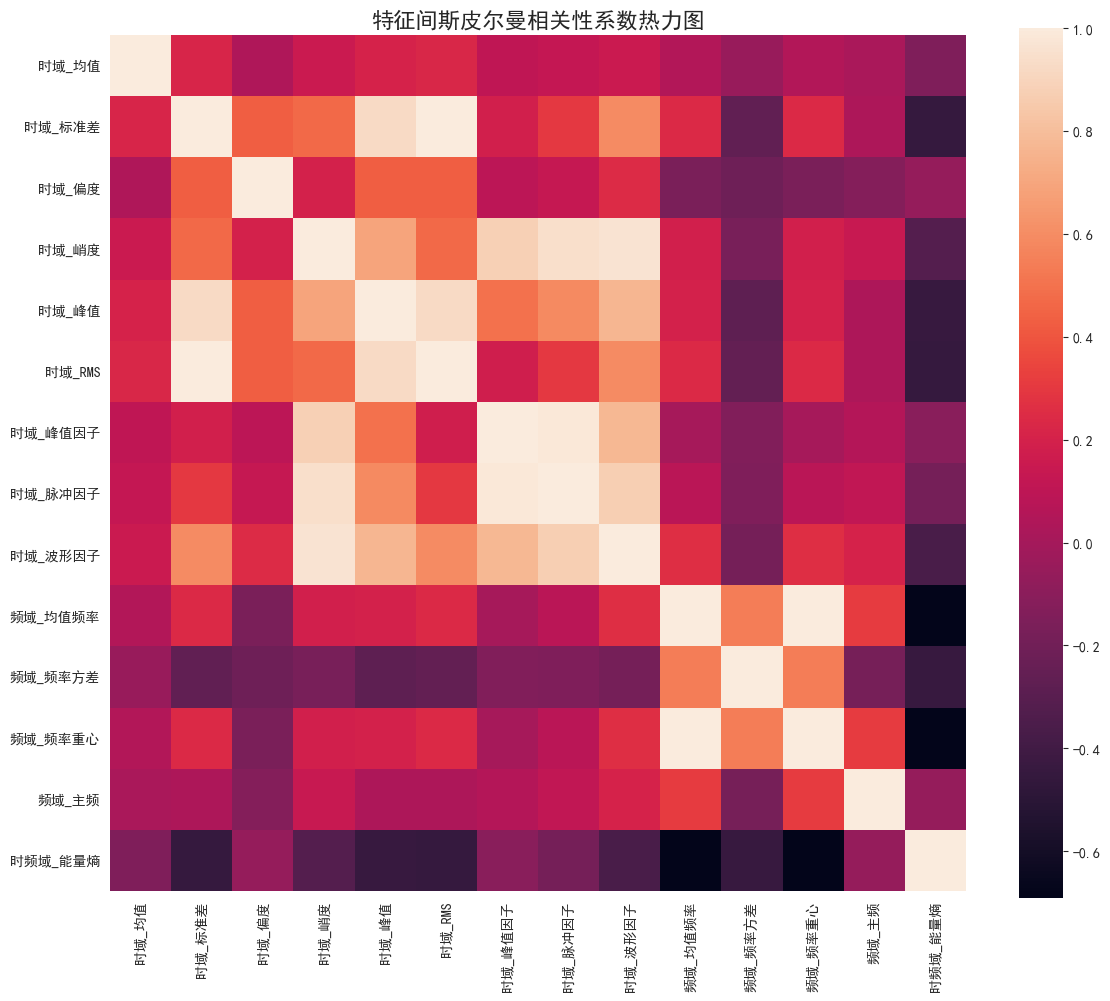

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ËØªÂèñÁâπÂæÅÊñá‰ª∂
df = pd.read_csv(r"all_features.csv")

# ÂéªÊéâÈùûÊï∞ÂÄºÂàóÔºàÊØîÂ¶ÇÊñá‰ª∂Âêç„ÄÅÊï∞ÊçÆÈõÜÊ†áÁ≠æÔºâ
numeric_df = df.select_dtypes(include=['float64','int64'])

# ËÆ°ÁÆóÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥ÊÄß
corr = numeric_df.corr(method='spearman')

# ÁªòÂà∂ÁÉ≠ÂäõÂõæ
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cbar=True, square=True,
            xticklabels=True, yticklabels=True)

plt.title("ÁâπÂæÅÈó¥ÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥ÊÄßÁ≥ªÊï∞ÁÉ≠ÂäõÂõæ", fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# ËØªÂèñÁâπÂæÅÊñá‰ª∂
df = pd.read_csv(r"all_features.csv")

# ÂéªÊéâÈùûÊï∞ÂÄºÂàó
meta_cols = ["Êï∞ÊçÆÈõÜ", "Êñá‰ª∂Âêç", "Êñá‰ª∂Â§π"]  # ÈùûÊï∞ÂÄºÂûãÁöÑÂàó
numeric_df = df.drop(columns=[col for col in meta_cols if col in df.columns])

# ËÆ°ÁÆóÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥ÊÄß
corr = numeric_df.corr(method="spearman").abs()

# ËÆæÁΩÆÈòàÂÄºÔºàÊØîÂ¶Ç 0.9 ‰ª•‰∏äÁÆóÂº∫Áõ∏ÂÖ≥Ôºâ
threshold = 0.9
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))

# ÊâæÂà∞Ë¶ÅÂà†Èô§ÁöÑÁâπÂæÅ
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Âº∫Áõ∏ÂÖ≥Ôºà>{threshold}ÔºâÁâπÂæÅ‰∏™Êï∞: {len(to_drop)}")
print("Â∞ÜÂà†Èô§Ëøô‰∫õÁâπÂæÅ:", to_drop)

# ÁîüÊàêÁ≠õÈÄâÂêéÁöÑË°®
filtered_df = df.drop(columns=to_drop)

# ‰øùÂ≠òËæìÂá∫
save_path = r"all_features_selected.csv"
filtered_df.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"‚úÖ Á≠õÈÄâÂêéÁöÑÁâπÂæÅË°®Â∑≤‰øùÂ≠ò: {save_path}")

Âº∫Áõ∏ÂÖ≥Ôºà>0.9ÔºâÁâπÂæÅ‰∏™Êï∞: 5
Â∞ÜÂà†Èô§Ëøô‰∫õÁâπÂæÅ: ['Êó∂Âüü_Â≥∞ÂÄº', 'Êó∂Âüü_RMS', 'Êó∂Âüü_ËÑâÂÜ≤Âõ†Â≠ê', 'Êó∂Âüü_Ê≥¢ÂΩ¢Âõ†Â≠ê', 'È¢ëÂüü_È¢ëÁéáÈáçÂøÉ']
‚úÖ Á≠õÈÄâÂêéÁöÑÁâπÂæÅË°®Â∑≤‰øùÂ≠ò: all_features_selected.csv


In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# ËØªÂèñÁâπÂæÅË°®ÔºàÁî®‰Ω†Á≠õÈÄâÂêéÁöÑÊñá‰ª∂Êõ¥ÂêàÈÄÇÔºâ
df = pd.read_csv(r"all_features.csv")

# Ê†áÁ≠æÂàóÔºåËøôÈáåÂÅáËÆæÁî®‚ÄúÊï∞ÊçÆÈõÜ‚ÄùÊàñËÄÖ‚ÄúÊñá‰ª∂Â§π‚Äù‰Ωú‰∏∫Á±ªÂà´Ê†áÁ≠æ
# ‰Ω†ÂèØ‰ª•Ê†πÊçÆÂÆûÈôÖÈúÄÊ±ÇÊç¢Êàê "Category" ÊàñËÄÖ "ÊïÖÈöúÁ±ªÂûã"
target_col = "Êñá‰ª∂Â§π" if "Êñá‰ª∂Â§π" in df.columns else "Êï∞ÊçÆÈõÜ"

# ÂàÜÁ¶ªÁâπÂæÅÂíåÊ†áÁ≠æ
X = df.drop(columns=["Êï∞ÊçÆÈõÜ","Êñá‰ª∂Âêç","Êñá‰ª∂Â§π"], errors="ignore")
y = df[target_col]

# Ê†áÁ≠æÁºñÁ†Å
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ÈöèÊú∫Ê£ÆÊûóËÆ≠ÁªÉ
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y_encoded)

# Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "ÁâπÂæÅ": X.columns,
    "ÈáçË¶ÅÊÄß": importances
}).sort_values(by="ÈáçË¶ÅÊÄß", ascending=False)

# ‰øùÂ≠òÁªìÊûú
save_path = r"feature_importance.csv"
importance_df.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"‚úÖ ÁâπÂæÅÈáçË¶ÅÊÄßÂ∑≤‰øùÂ≠ò: {save_path}")
print(importance_df.head(10))  # ÊâìÂç∞Ââç10‰∏™ÊúÄÈáçË¶ÅÁöÑÁâπÂæÅ

‚úÖ ÁâπÂæÅÈáçË¶ÅÊÄßÂ∑≤‰øùÂ≠ò: feature_importance.csv
         ÁâπÂæÅ       ÈáçË¶ÅÊÄß
1    Êó∂Âüü_Ê†áÂáÜÂ∑Æ  0.100920
5    Êó∂Âüü_RMS  0.098249
4     Êó∂Âüü_Â≥∞ÂÄº  0.091922
6   Êó∂Âüü_Â≥∞ÂÄºÂõ†Â≠ê  0.086610
9   È¢ëÂüü_ÂùáÂÄºÈ¢ëÁéá  0.083384
11  È¢ëÂüü_È¢ëÁéáÈáçÂøÉ  0.083049
7   Êó∂Âüü_ËÑâÂÜ≤Âõ†Â≠ê  0.076672
8   Êó∂Âüü_Ê≥¢ÂΩ¢Âõ†Â≠ê  0.068551
3     Êó∂Âüü_Â≥≠Â∫¶  0.064638
10  È¢ëÂüü_È¢ëÁéáÊñπÂ∑Æ  0.062170


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ËØªÂèñÁâπÂæÅË°®
df = pd.read_csv(r"all_features.csv")

# ÂÆö‰πâÊò†Â∞ÑËßÑÂàôÔºàÊõ¥ÁªÜÂåñÔºâ
def extract_fault_type(row):
    folder = str(row.get("Êñá‰ª∂Â§π", "")) + str(row.get("Êñá‰ª∂Âêç", ""))

    if "B" in folder and "Normal" not in folder:  # ÈÅøÂÖçËØØÂà§ Normal
        return "ÊªöÂä®‰ΩìÊïÖÈöú"
    elif "IR" in folder:
        return "ÂÜÖÂúàÊïÖÈöú"
    elif "OR" in folder:
        return "Â§ñÂúàÊïÖÈöú"
    elif "Normal" in folder:
        return "Ê≠£Â∏∏"
    else:
        return "Êú™Áü•"

# Êñ∞Â¢ûÊïÖÈöúÁ±ªÂûãÂàó
df["ÊïÖÈöúÁ±ªÂûã"] = df.apply(extract_fault_type, axis=1)

# ÁºñÁ†Å
le = LabelEncoder()
df["ÊïÖÈöúÁ±ªÂûãÁºñÁ†Å"] = le.fit_transform(df["ÊïÖÈöúÁ±ªÂûã"])

print("Ê†áÁ≠æÊò†Â∞ÑÔºö", dict(zip(le.classes_, le.transform(le.classes_))))

# ‰øùÂ≠òÊñ∞Êñá‰ª∂
save_path = r"all_features_with_labels.csv"
df.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"‚úÖ Â∑≤‰øùÂ≠ò: {save_path}")

Ê†áÁ≠æÊò†Â∞ÑÔºö {'ÂÜÖÂúàÊïÖÈöú': np.int64(0), 'Â§ñÂúàÊïÖÈöú': np.int64(1), 'Ê≠£Â∏∏': np.int64(2), 'ÊªöÂä®‰ΩìÊïÖÈöú': np.int64(3)}
‚úÖ Â∑≤‰øùÂ≠ò: all_features_with_labels.csv


In [23]:
import pandas as pd

# ËØªÂèñÁâπÂæÅË°®
df = pd.read_csv(r"all_features_with_labels.csv")

# Âà†Èô§‰∏çÈúÄË¶ÅÁöÑÂàó
drop_cols = ["Êï∞ÊçÆÈõÜ", "Êñá‰ª∂Âêç", "Êñá‰ª∂Â§π", "ÊïÖÈöúÁ±ªÂûã"]
df_clean = df.drop(columns=[col for col in drop_cols if col in df.columns])

# ‰øùÂ≠òÊñ∞ÁöÑÊñá‰ª∂
save_path = r"all_features_clean.csv"
df_clean.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"‚úÖ Â∑≤‰øùÂ≠ò: {save_path}")
print("Êñ∞Ë°®Ê†ºÂàóÂêçÔºö", df_clean.columns.tolist())

‚úÖ Â∑≤‰øùÂ≠ò: all_features_clean.csv
Êñ∞Ë°®Ê†ºÂàóÂêçÔºö ['Êó∂Âüü_ÂùáÂÄº', 'Êó∂Âüü_Ê†áÂáÜÂ∑Æ', 'Êó∂Âüü_ÂÅèÂ∫¶', 'Êó∂Âüü_Â≥≠Â∫¶', 'Êó∂Âüü_Â≥∞ÂÄº', 'Êó∂Âüü_RMS', 'Êó∂Âüü_Â≥∞ÂÄºÂõ†Â≠ê', 'Êó∂Âüü_ËÑâÂÜ≤Âõ†Â≠ê', 'Êó∂Âüü_Ê≥¢ÂΩ¢Âõ†Â≠ê', 'È¢ëÂüü_ÂùáÂÄºÈ¢ëÁéá', 'È¢ëÂüü_È¢ëÁéáÊñπÂ∑Æ', 'È¢ëÂüü_È¢ëÁéáÈáçÂøÉ', 'È¢ëÂüü_‰∏ªÈ¢ë', 'Êó∂È¢ëÂüü_ËÉΩÈáèÁÜµ', 'ÊïÖÈöúÁ±ªÂûãÁºñÁ†Å']
